# Imports

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pickle import load
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report

2024-11-24 22:37:26.532747: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-24 22:37:26.535555: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-24 22:37:26.545117: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1732480646.561618   56867 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732480646.566249   56867 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-24 22:37:26.582818: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [2]:
BASE_DIR = os.path.abspath("")
TEST_DATA_PATH = os.path.join(BASE_DIR, "..", "data", "landmines-test.csv")
METRICS_PATH = os.path.join(BASE_DIR, "..", "out", "metrics.csv")
LOGISTIC_REGRESSION_PATH = os.path.join(BASE_DIR, "..", "out", "logistic-regression.pkl")
MODEL_PATH = os.path.join(BASE_DIR, "..", "out", "landmines.keras")

TARGET_COLUMN = "is_mine"

# Data Loading

## Test Data

In [3]:
df_test = pd.read_csv(TEST_DATA_PATH)

In [4]:
x_test = df_test.drop(columns=[TARGET_COLUMN]).values
y_test = df_test[[TARGET_COLUMN]].values

In [5]:
x_test[:5]

array([[0.21309665, 0.81818182, 0.4       ],
       [0.32024133, 0.09090909, 0.        ],
       [0.3950448 , 0.81818182, 0.6       ],
       [0.25377617, 0.90909091, 0.        ],
       [0.28700875, 1.        , 1.        ]])

In [6]:
y_test[:5]

array([[1],
       [0],
       [1],
       [0],
       [0]])

## Logistic Regression

In [7]:
with open(LOGISTIC_REGRESSION_PATH, "rb") as file:
    lr = load(file)

## ANN

In [8]:
model = load_model(MODEL_PATH)
model.summary()

2024-11-24 22:37:28.237760: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (1, 64)                │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (1, 64)                │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (1, 64)                │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (1, 64)                │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (1, 64)                │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (1, 64)                │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (1, 64)                │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (1, 64)                │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (1, 64)                │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (1, 1)                 │            65 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (1, 1)                 │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,641 (33.75 KB)

 Trainable params: 8,641 (33.75 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
metrics = pd.read_csv(METRICS_PATH)
metrics["epoch"] = metrics.index + 1
metrics.head()

,binary_accuracy,loss,val_binary_accuracy,val_loss,epoch
0,0.522248,0.694719,0.504673,0.689777,1
1,0.498829,0.686032,0.485981,0.684395,2
2,0.515222,0.679962,0.485981,0.675984,3
3,0.557377,0.661119,0.551402,0.661125,4
4,0.604215,0.644517,0.663551,0.640829,5


# Predictions

## Correct

In [10]:
y_test[:5]

array([[1],
       [0],
       [1],
       [0],
       [0]])

## Logistic Regression

In [11]:
y_pred_lr_orig = lr.predict_proba(x_test)[:, 1]
y_pred_lr_orig = np.expand_dims(y_pred_lr_orig, axis=1)
y_pred_lr_orig[:5]

array([[0.33576419],
       [0.35686044],
       [0.61358057],
       [0.42340651],
       [0.47343283]])

In [12]:
y_pred_lr = lr.predict(x_test)
y_pred_lr = np.expand_dims(y_pred_lr, axis=1)
y_pred_lr[:5]

array([[0],
       [0],
       [1],
       [0],
       [0]])

## ANN

In [13]:
y_pred_ann_orig = model.predict(x_test)
y_pred_ann_orig[:5]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


array([[0.8718883 ],
       [0.00615253],
       [0.999999  ],
       [0.0025195 ],
       [0.11948665]], dtype=float32)

In [14]:
y_pred_ann = y_pred_ann_orig.round().astype("int")
y_pred_ann[:5]

array([[1],
       [0],
       [1],
       [0],
       [0]])

# Evaluation

## Confusion Matrices

### Logistic Regression

In [15]:
print(confusion_matrix(y_test, y_pred_lr))

[[53  2]
 [13 39]]


### ANN

In [16]:
print(confusion_matrix(y_test, y_pred_ann))

[[55  0]
 [ 1 51]]


## Classification Reports

### Logistic Regression

In [17]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.80      0.96      0.88        55
           1       0.95      0.75      0.84        52

    accuracy                           0.86       107
   macro avg       0.88      0.86      0.86       107
weighted avg       0.88      0.86      0.86       107



### ANN

In [18]:
print(classification_report(y_test, y_pred_ann))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        55
           1       1.00      0.98      0.99        52

    accuracy                           0.99       107
   macro avg       0.99      0.99      0.99       107
weighted avg       0.99      0.99      0.99       107



# Further Analysis

## Training Plots

<Axes: >

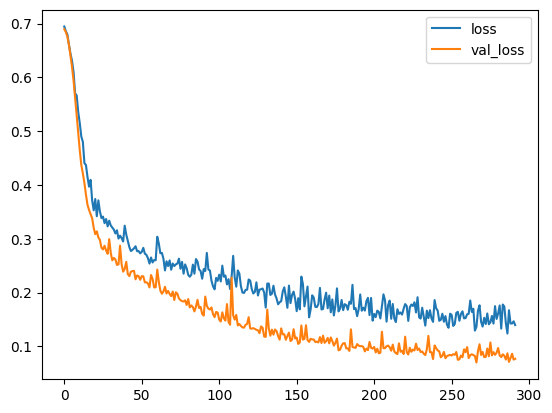

In [19]:
metrics[["loss", "val_loss"]].plot()

<Axes: >

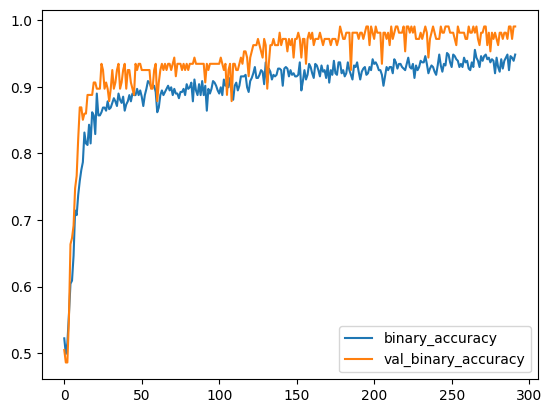

In [20]:
metrics[["binary_accuracy", "val_binary_accuracy"]].plot()

## Prediction Histograms

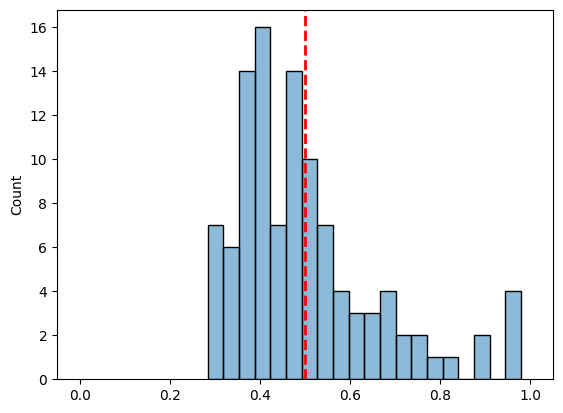

In [21]:
ax = sns.histplot(y_pred_lr_orig, bins=20, legend=False)
ax.set_xlim((-0.05, 1.05))
ax.axvline(x=0.5, linewidth=2, linestyle="--", color="red")

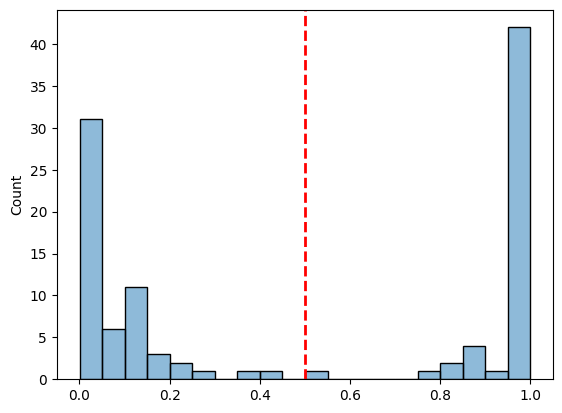

In [22]:
ax = sns.histplot(y_pred_ann_orig, bins=20, legend=False)
ax.set_xlim((-0.05, 1.05))
ax.axvline(x=0.5, linewidth=2, linestyle="--", color="red")

# Best Model

In [23]:
len(metrics)

292

In [24]:
best_epoch = metrics["val_loss"].argmin()
best_epoch

np.int64(266)

In [25]:
metrics.iloc[best_epoch]

binary_accuracy          0.943794
loss                     0.136305
val_binary_accuracy      0.990654
val_loss                 0.070061
epoch                  267.000000
Name: 266, dtype: float64

## Wrong Predictions

### Target = 0, Prediction = 1

In [26]:
y_pred_lr_orig[(y_test == 0) & (y_pred_lr == 1)]

array([0.5203921 , 0.51501685])

In [27]:
y_pred_ann_orig[(y_test == 0) & (y_pred_ann == 1)]

array([], dtype=float32)

### Target = 1, Prediction = 0

In [28]:
y_pred_lr_orig[(y_test == 1) & (y_pred_lr == 0)]

array([0.33576419, 0.49113234, 0.28693584, 0.49929454, 0.28405317,
       0.48042544, 0.30391902, 0.49544181, 0.46913318, 0.49242809,
       0.45529717, 0.4714877 , 0.34867696])

In [29]:
y_pred_ann_orig[(y_test == 1) & (y_pred_ann == 0)]

array([0.19939627], dtype=float32)